In [ ]:
import numpy
import pandas

from matplotlib import pylab as plt

import aux_micro

In [ ]:
import os
os.system("bash -i -c 'cp $POPJSON_WPATH/population.* ./'")
os.system("popjson models/model_aegypti")

import population as pop
model = pop.model("models/model_aegypti.dylib")

In [12]:
dat = pandas.read_csv("https://veclim.com/files/workshops/September2025/clim/MissionI/clim_MissionI_Larnaca_V2025-09-11.csv")

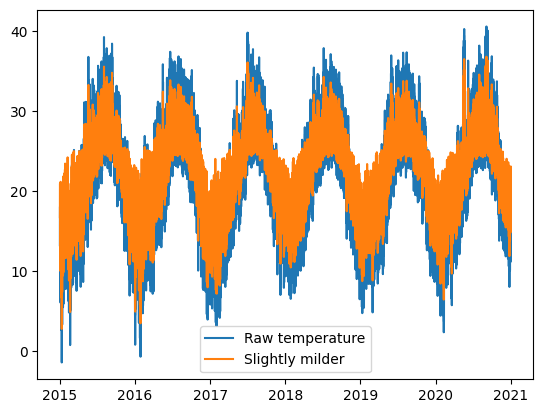

In [18]:
dat['time'] = pandas.to_datetime(dat['time'])

temp_raw = dat['temp']
temp_mild = aux_micro.micro_optimum(temp_raw,2.5)

plt.plot(dat['time'],temp_raw,label="Raw temperature")
plt.plot(dat['time'],temp_mild,label="Slightly milder")
plt.legend()
plt.show()

In [19]:
pr = numpy.array([10,-0.88795,25,-0.146617,400,1,10,-6.00179,-1.82367,16.5314,12877.2,1,240.108,0.543329,14.9951,0.9,12,0.6,22,0.929549,1000,0.5,0,2051.56,0.1,300,-4.8,1,0.1,17,0.6,17,0.929549,1000,0.5,36,2051.56,0.15,0.9,0.5,0.5,0.000923007,0.00205535,20.0499,100,100,26,-0.5,45,1700,1,0.1,16.5,1,15,-1.2,870,0.001,0.1])

sim = model.sim(len(dat['time']),
                  envir={
                    'temp':temp_mild,
                    'prec':dat['prec'],
                    'evap':dat['evap'],
                    'rehum':dat['rhum'],
                    'pdens':dat['popd'],
                    'experiment':[0],
                    'configure': [1]
                  },
                  pr=pr,
                  y0={
                      "pop_Eh": 1000.0
                  })

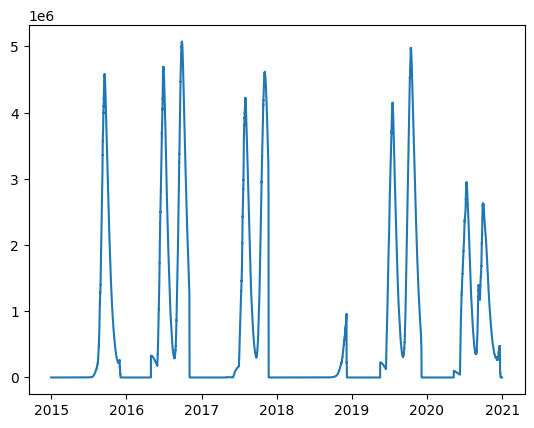

In [20]:
plt.plot(dat['time'], sim['ret'][0,:,model.popids['pop_Af']])
plt.show()